In [1279]:
# Import necessary packages
import pandas as pd
import numpy as np
import os,sys
import seaborn as sns


In [1280]:
# Check current working directory
os.getcwd()

'/Users/yeonjoo/Downloads/Unilateral_foot'

In [1281]:
# Change directory if necessary
#newdirectory = input("Path: ")
#os.chdir(newdirectory)
#os.getcwd()

In [1282]:
# File import by filename
Subject = input("Subject: ")
Trial = input("Trial: ")
filename = Subject + "Trial"+ Trial

df = pd.read_csv(filename +'.csv')
df.head()

Subject: G03
Trial: 04A25


,LHEEX,LHEEY,LHEEZ,LTOEX,LTOEY,LTOEZ,RHEEX,RHEEY,RHEEZ,RTOEX,RTOEY,RTOEZ
0,189.152771,256.757263,336.653137,63.909718,239.925537,219.039566,-259.852325,325.168457,223.747375,-435.982056,314.975159,206.162186
1,186.516205,256.594086,342.559662,68.784767,240.193253,219.798218,-253.759476,325.795959,224.215530,-429.983765,315.252838,206.089050
2,182.686676,256.447327,349.741211,74.126518,240.073868,221.036438,-246.059204,326.562531,224.780609,-422.402313,315.660065,206.042007
3,177.599594,256.372498,357.760742,79.219521,239.291382,222.854004,-237.053528,327.442413,225.408127,-413.525574,316.211060,206.045959
4,171.292526,256.439972,366.107758,83.263550,237.568130,225.314087,-227.115555,328.411530,226.062485,-403.706177,316.915863,206.120865


In [1283]:
df = pd.read_csv(filename +'.csv')
df.head()

,LHEEX,LHEEY,LHEEZ,LTOEX,LTOEY,LTOEZ,RHEEX,RHEEY,RHEEZ,RTOEX,RTOEY,RTOEZ
0,189.152771,256.757263,336.653137,63.909718,239.925537,219.039566,-259.852325,325.168457,223.747375,-435.982056,314.975159,206.162186
1,186.516205,256.594086,342.559662,68.784767,240.193253,219.798218,-253.759476,325.795959,224.215530,-429.983765,315.252838,206.089050
2,182.686676,256.447327,349.741211,74.126518,240.073868,221.036438,-246.059204,326.562531,224.780609,-422.402313,315.660065,206.042007
3,177.599594,256.372498,357.760742,79.219521,239.291382,222.854004,-237.053528,327.442413,225.408127,-413.525574,316.211060,206.045959
4,171.292526,256.439972,366.107758,83.263550,237.568130,225.314087,-227.115555,328.411530,226.062485,-403.706177,316.915863,206.120865


In [1284]:
# Use Only When first rows are "0" =====> Need to code "IF"

#df.drop([0,0], inplace=True)
#df = df.reset_index(drop=True)
#df.head()

In [1285]:
#df.head()

In [1286]:
# Calculate Heel and Toe Marker Velocity
col_names = ['LHEEX','RHEEX', 'LTOEX', 'RTOEX']
name_rows_dict1 = {}

for col in col_names:
    vel_rows = []
    for idx, value in enumerate(df[col]):
        if idx == 0:
            vel_rows.append(0)
        else:
            vel_row = (df.loc[idx,col] - df.loc[idx-1,col])*100
            vel_rows.append(vel_row)
    name_rows_dict1[col] = vel_rows

vel_df = pd.DataFrame(name_rows_dict1)
vel_df = vel_df.drop(0)
vel_df = vel_df.reset_index(drop=True)
vel_df.head(10)

,LHEEX,RHEEX,LTOEX,RTOEX
0,-263.6566,609.2849,487.5049,599.8291
1,-382.9529,770.0272,534.1751,758.1452
2,-508.7082,900.5676,509.3003,887.6739
3,-630.7068,993.7973,404.4029,981.9397
4,-741.3376,1052.3026,225.5623,1043.1549
5,-836.0870,1083.5006,-10.0327,1077.4201
6,-913.0310,1095.8146,-278.2951,1091.6839
7,-972.3618,1096.3134,-553.6537,1092.3462
8,-1016.0972,1089.9536,-814.4127,1085.0342
9,-1047.6074,1080.2155,-1046.1609,1074.4751


In [1287]:
# Identify Left Heel Strike
# by Left Heel marker velocity changes its direction
name_rows_dict2 = {}

lstrike_rows = []
for idx, value in enumerate(vel_df['LHEEX']):
    if idx == 0:
        idx = idx + 1
    else:
        if vel_df.loc[idx, 'LHEEX'] < 0:
            idx = idx + 1 
        else:
            if vel_df.loc[idx - 1, 'LHEEX'] > 0:
                idx = idx + 1 
            else:
                lstrike_rows.append(idx - 1)
            
name_rows_dict2['LHSidx'] = lstrike_rows

lstrike_df = pd.DataFrame(name_rows_dict2)
lstrike_df.head(), len(lstrike_df)

(   LHSidx
 0      39
 1     135
 2     231
 3     326
 4     425,
 304)

In [1288]:
# Identify Left Toe Off
# by Left Toe marker velocity changes its direction
name_rows_dict3 = {}

ltoff_rows = []
for idx, value in enumerate(vel_df['LTOEX']):
    if idx == 0:
        idx = idx + 1
    else:
        if vel_df.loc[idx, 'LTOEX'] > 0:
            idx = idx + 1 
        else:
            if vel_df.loc[idx - 1, 'LTOEX'] < 0:
                idx = idx + 1 
            else:
                ltoff_rows.append(idx - 1)
            
name_rows_dict3['LTOidx'] = ltoff_rows

ltoff_df = pd.DataFrame(name_rows_dict3)
ltoff_df.head(), len(ltoff_df)

(   LTOidx
 0       4
 1     100
 2     195
 3     293
 4     388,
 305)

In [1289]:
# Identify left side repeated Heel Strike(first interval default 55)

lefts = []
for idx in lstrike_df.index:
    if idx == 0:
        lefts.append(55)
    else:
        left = (lstrike_df.loc[idx, 'LHSidx']- lstrike_df.loc[idx - 1, 'LHSidx'])
        lefts.append(left)

lstrike_df['lHSinterval'] = lefts
lstrike_df.head(), lstrike_df['lHSinterval'].unique(), lstrike_df.count()

(   LHSidx  lHSinterval
 0      39           55
 1     135           96
 2     231           96
 3     326           95
 4     425           99,
 array([ 55,  96,  95,  99,  98,  94,  97, 102, 100, 103, 106, 104, 105,
        101, 112,  92,  93,  91,  89,  84, 108, 110, 107, 111, 122, 109,
        114]),
 LHSidx         304
 lHSinterval    304
 dtype: int64)

In [1290]:
# Identify left side repeated Toe Off (first interval default 55)

lefts = []
for idx in ltoff_df.index:
    if idx == 0:
        lefts.append(55)
    else:
        left = (ltoff_df.loc[idx, 'LTOidx']- ltoff_df.loc[idx - 1, 'LTOidx'])
        lefts.append(left)

ltoff_df['lTOinterval'] = lefts
ltoff_df.head(), ltoff_df['lTOinterval'].unique(), ltoff_df.count()

(   LTOidx  lTOinterval
 0       4           55
 1     100           96
 2     195           95
 3     293           98
 4     388           95,
 array([ 55,  96,  95,  98, 100,  97,  99,  94, 102, 106, 103, 105, 101,
        104, 113,  91,  93,  92,  86,  89,  90,  88, 107, 109, 118, 112,
        110]),
 LTOidx         305
 lTOinterval    305
 dtype: int64)

In [1291]:
len(lstrike_df[lstrike_df['lHSinterval'] < 55])

0

In [1292]:
lstrike_df.values[lstrike_df['lHSinterval'] < 80]

array([[39, 55]])

In [1293]:
len(ltoff_df[ltoff_df['lTOinterval'] < 55])

0

In [1294]:
ltoff_df.values[ltoff_df['lTOinterval'] < 80]

array([[ 4, 55]])

<AxesSubplot: >

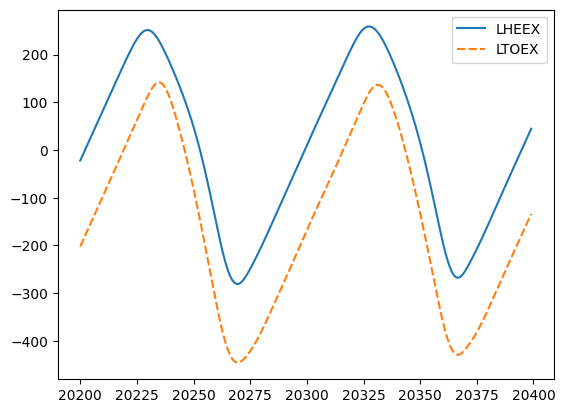

In [1295]:
df_left = df.iloc[20200:20400, [0,3]]
lhs = sns.lineplot(data=df_left)
lhs

In [1296]:
#Drop left side repeated Heel Strike
for idx, row in lstrike_df.iterrows():
    if row['lHSinterval'] < 55:
        lstrike_df.drop(idx, inplace=True)


lstrike_df.head(), lstrike_df['lHSinterval'].unique(), lstrike_df.count()

(   LHSidx  lHSinterval
 0      39           55
 1     135           96
 2     231           96
 3     326           95
 4     425           99,
 array([ 55,  96,  95,  99,  98,  94,  97, 102, 100, 103, 106, 104, 105,
        101, 112,  92,  93,  91,  89,  84, 108, 110, 107, 111, 122, 109,
        114]),
 LHSidx         304
 lHSinterval    304
 dtype: int64)

In [1297]:
#Drop left side repeated Toe Off
for idx, row in ltoff_df.iterrows():
    if row['lTOinterval'] < 55:
        ltoff_df.drop(idx, inplace=True)


ltoff_df.head(), ltoff_df['lTOinterval'].unique(), ltoff_df.count()

(   LTOidx  lTOinterval
 0       4           55
 1     100           96
 2     195           95
 3     293           98
 4     388           95,
 array([ 55,  96,  95,  98, 100,  97,  99,  94, 102, 106, 103, 105, 101,
        104, 113,  91,  93,  92,  86,  89,  90,  88, 107, 109, 118, 112,
        110]),
 LTOidx         305
 lTOinterval    305
 dtype: int64)

In [1298]:
#lstrike_df.index[(lstrike_df['lHSinterval']== 76)]

In [1299]:
#lstrike_df.iloc[181]

In [1300]:
#lstrike_df1 = lstrike_df.drop(181)

In [1301]:
#lstrike_df1.iloc[175:185]

In [1302]:
#lstrike_df.index[(lstrike_df['lHSinterval']== 83)]

In [1303]:
#lstrike_df.iloc[170:175]

In [1304]:
#rstrike_df.iloc[170:175]

In [1305]:
#Concate HS and TO event time & make sure them to be int 64
lstrike_df = pd.concat([lstrike_df,ltoff_df], axis=1)
lstrike_df = lstrike_df.astype('Int64')
lstrike_df.head()

,LHSidx,lHSinterval,LTOidx,lTOinterval
0,39,55,4,55
1,135,96,100,96
2,231,96,195,95
3,326,95,293,98
4,425,99,388,95


In [1306]:
# Reset the index for left foot
lstrike_df = lstrike_df.reset_index(drop=True)
lstrike_df = lstrike_df.dropna()
lstrike_df.head(), len(lstrike_df)

(   LHSidx  lHSinterval  LTOidx  lTOinterval
 0      39           55       4           55
 1     135           96     100           96
 2     231           96     195           95
 3     326           95     293           98
 4     425           99     388           95,
 304)

In [1307]:
# Get trajectory for left heelstrike and left toeoff
LHSval = pd.DataFrame(df.loc[lstrike_df['LHSidx'], ['LHEEX','LHEEY']])
LHSval_reidx = LHSval.reset_index().drop(columns=['index'])

LTOval = pd.DataFrame(df.loc[lstrike_df['LTOidx'], ['LTOEX','LTOEZ']])
LTOval_reidx = LTOval.reset_index().drop(columns=['index'])


In [1308]:
# Concate the left HS and TO
LHS_df = pd.concat([lstrike_df, LHSval_reidx, LTOval_reidx], axis=1)
LHS_df.head()

,LHSidx,lHSinterval,LTOidx,lTOinterval,LHEEX,LHEEY,LTOEX,LTOEZ
0,39,55,4,55,-327.737030,167.729019,83.263550,225.314087
1,135,96,100,96,-346.331573,96.996010,75.726944,221.817596
2,231,96,195,95,-374.195740,207.163254,50.369080,222.309433
3,326,95,293,98,-370.238983,124.638481,38.346024,222.991989
4,425,99,388,95,-388.549652,222.588074,49.830116,223.358185


In [1309]:
#NEW!!!! #Identify right heel strike
name_rows_dict4 = {}

rstrike_rows = []
for idx, value in enumerate(vel_df['RHEEX']):
    if idx == 0:
        idx = idx + 1
    else:
        if vel_df.loc[idx, 'RHEEX'] < 0:
            idx = idx + 1 
        else:
            if vel_df.loc[idx - 1, 'RHEEX'] > 0:
                idx = idx + 1 
            else:
                rstrike_rows.append(idx - 1)
            
name_rows_dict4['RHSidx'] = rstrike_rows

rstrike_df = pd.DataFrame(name_rows_dict4)
rstrike_df.head(), len(rstrike_df)

(   RHSidx
 0      88
 1     181
 2     280
 3     374
 4     472,
 304)

In [1310]:
# Identify Right Toe Off
# by Right Toe marker velocity changes its direction from positive to negative
name_rows_dict5 = {}

rtoff_rows = []
for idx, value in enumerate(vel_df['RTOEX']):
    if idx == 0:
        idx = idx + 1
    else:
        if vel_df.loc[idx, 'RTOEX'] > 0:
            idx = idx + 1 
        else:
            if vel_df.loc[idx - 1, 'RTOEX'] < 0:
                idx = idx + 1 
            else:
                rtoff_rows.append(idx - 1)
            
name_rows_dict5['RTOidx'] = rtoff_rows

rtoff_df = pd.DataFrame(name_rows_dict5)
rtoff_df.head(), len(rtoff_df)

(   RTOidx
 0      53
 1     147
 2     245
 3     339
 4     438,
 304)

In [1311]:
# Identify right side repeated Heel Strike (first interval default 55)

rights = []
for idx in rstrike_df.index:
    if idx == 0:
        rights.append(55)
    else:
        right = (rstrike_df.loc[idx, 'RHSidx']- rstrike_df.loc[idx - 1, 'RHSidx'])
        rights.append(right)

rstrike_df['rHSinterval'] = rights
rstrike_df.head(), rstrike_df['rHSinterval'].unique(),  rstrike_df.count()

(   RHSidx  rHSinterval
 0      88           55
 1     181           93
 2     280           99
 3     374           94
 4     472           98,
 array([ 55,  93,  99,  94,  98, 101,  96,  95, 102, 100, 103, 106,  97,
        114, 104,  90,  91,  92,  87, 105,  88, 108, 109, 107, 122, 113,
        110]),
 RHSidx         304
 rHSinterval    304
 dtype: int64)

In [1312]:
# Identify right side repeated Toe Off (first interval default 55)

rights = []
for idx in rtoff_df.index:
    if idx == 0:
        rights.append(55)
    else:
        right = (rtoff_df.loc[idx, 'RTOidx']- rtoff_df.loc[idx - 1, 'RTOidx'])
        rights.append(right)

rtoff_df['rTOinterval'] = rights
rtoff_df.head(), rtoff_df['rTOinterval'].unique(),  rtoff_df.count()

(   RTOidx  rTOinterval
 0      53           55
 1     147           94
 2     245           98
 3     339           94
 4     438           99,
 array([ 55,  94,  98,  99, 100,  95,  96,  92, 102,  97, 101, 104, 103,
        106,  93, 113,  89,  91,  82, 107,  90, 105, 108, 117, 115, 112,
        111]),
 RTOidx         304
 rTOinterval    304
 dtype: int64)

In [1313]:
len(rstrike_df[rstrike_df['rHSinterval'] < 55])

0

In [1314]:
rstrike_df.values[rstrike_df['rHSinterval'] < 55]

array([], shape=(0, 2), dtype=int64)

In [1315]:
len(rtoff_df[rtoff_df['rTOinterval'] < 55])

0

In [1316]:
rtoff_df.values[rtoff_df['rTOinterval'] < 55]

array([], shape=(0, 2), dtype=int64)

<AxesSubplot: >

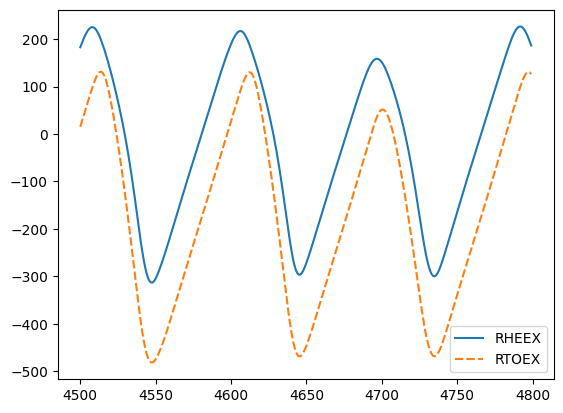

In [1317]:
df_right = df.iloc[4500:4800, [6,9]]
rhs = sns.lineplot(data=df_right)
rhs

In [1318]:
#rstrike_df.index[(rstrike_df['rHSinterval']== 45)]

In [1319]:
rstrike_df.iloc[40:50]

,RHSidx,rHSinterval
40,4048,114
41,4151,103
42,4250,99
43,4354,104
44,4451,97
45,4546,95
46,4644,98
47,4734,90
48,4830,96
49,4925,95


In [1320]:
#rstrike_df.drop(45, inplace=True)

In [1321]:
#rstrike_df = rstrike_df.reset_index(drop=True)

In [1322]:
#rtoff_df.index[(rtoff_df['rTOinterval']== 43)]

In [1323]:
rtoff_df.iloc[40:50]

,RTOidx,rTOinterval
40,4012,113
41,4116,104
42,4215,99
43,4319,104
44,4417,98
45,4513,96
46,4611,98
47,4700,89
48,4796,96
49,4891,95


In [1324]:
#rtoff_df.drop(44, inplace=True)

In [1325]:
#rtoff_df = rtoff_df.reset_index(drop=True)

In [1326]:
#rtoff_df.index[(rtoff_df['rTOinterval']== 68)]

In [1327]:
#rtoff_df.iloc[215:225]

In [1328]:
#Drop right side repeated Heel Strike
for idx, row in rstrike_df.iterrows():
    if row['rHSinterval'] < 55:
        rstrike_df.drop(idx, inplace=True)

rstrike_df.head(), rstrike_df['rHSinterval'].unique(), rstrike_df.count()

(   RHSidx  rHSinterval
 0      88           55
 1     181           93
 2     280           99
 3     374           94
 4     472           98,
 array([ 55,  93,  99,  94,  98, 101,  96,  95, 102, 100, 103, 106,  97,
        114, 104,  90,  91,  92,  87, 105,  88, 108, 109, 107, 122, 113,
        110]),
 RHSidx         304
 rHSinterval    304
 dtype: int64)

In [1329]:
#Drop right side repeated Toe Off
for idx, row in rtoff_df.iterrows():
    if row['rTOinterval'] < 55:
        rtoff_df.drop(idx, inplace=True)

rtoff_df.head(), rtoff_df['rTOinterval'].unique(), rtoff_df.count()

(   RTOidx  rTOinterval
 0      53           55
 1     147           94
 2     245           98
 3     339           94
 4     438           99,
 array([ 55,  94,  98,  99, 100,  95,  96,  92, 102,  97, 101, 104, 103,
        106,  93, 113,  89,  91,  82, 107,  90, 105, 108, 117, 115, 112,
        111]),
 RTOidx         304
 rTOinterval    304
 dtype: int64)

In [1330]:
#Concate HS and TO event time & make sure them to be int 64
rstrike_df = pd.concat([rstrike_df,rtoff_df], axis=1)
rstrike_df = rstrike_df.astype('Int64')
rstrike_df.head()

,RHSidx,rHSinterval,RTOidx,rTOinterval
0,88,55,53,55
1,181,93,147,94
2,280,99,245,98
3,374,94,339,94
4,472,98,438,99


In [1331]:
# Reset the index for right foot
rstrike_df = rstrike_df.reset_index(drop=True)
rstrike_df = rstrike_df.dropna()
rstrike_df.head(), len(rstrike_df)

(   RHSidx  rHSinterval  RTOidx  rTOinterval
 0      88           55      53           55
 1     181           93     147           94
 2     280           99     245           98
 3     374           94     339           94
 4     472           98     438           99,
 304)

In [1332]:
# Get trajectory for left heelstrike and left toeoff
RHSval = pd.DataFrame(df.loc[rstrike_df['RHSidx'], ['RHEEX','RHEEY']])
RHSval_reidx = RHSval.reset_index().drop(columns=['index'])

RTOval = pd.DataFrame(df.loc[rstrike_df['RTOidx'], ['RTOEX','RTOEZ']])
RTOval_reidx = RTOval.reset_index().drop(columns=['index'])


In [1333]:
# Concate the right HS and TO
RHS_df = pd.concat([rstrike_df, RHSval_reidx, RTOval_reidx], axis=1)
RHS_df.head()

,RHSidx,rHSinterval,RTOidx,rTOinterval,RHEEX,RHEEY,RTOEX,RTOEZ
0,88,55,53,55,-322.777527,243.088623,94.397705,229.578400
1,181,93,147,94,-381.110321,286.029327,66.872772,225.800629
2,280,99,245,98,-367.615601,297.366791,49.567711,226.099426
3,374,94,339,94,-378.644287,247.465240,20.645479,223.764633
4,472,98,438,99,-375.892853,284.743500,62.856800,228.711823


In [1334]:
# Merge left and right side HS and TO 
strike_df = pd.merge(LHS_df, RHS_df, left_index = True, right_index = True)
strike_df.head()

,LHSidx,lHSinterval,LTOidx,lTOinterval,LHEEX,LHEEY,LTOEX,LTOEZ,RHSidx,rHSinterval,RTOidx,rTOinterval,RHEEX,RHEEY,RTOEX,RTOEZ
0,39,55,4,55,-327.737030,167.729019,83.263550,225.314087,88,55,53,55,-322.777527,243.088623,94.397705,229.578400
1,135,96,100,96,-346.331573,96.996010,75.726944,221.817596,181,93,147,94,-381.110321,286.029327,66.872772,225.800629
2,231,96,195,95,-374.195740,207.163254,50.369080,222.309433,280,99,245,98,-367.615601,297.366791,49.567711,226.099426
3,326,95,293,98,-370.238983,124.638481,38.346024,222.991989,374,94,339,94,-378.644287,247.465240,20.645479,223.764633
4,425,99,388,95,-388.549652,222.588074,49.830116,223.358185,472,98,438,99,-375.892853,284.743500,62.856800,228.711823


In [1335]:
# Calculate step time


Rsteptime = []
Lsteptime = []

for idx in strike_df.index:
    if strike_df.loc[0, 'LHSidx'] < strike_df.loc[0, 'RHSidx']:
        if idx == 0:
            Rstep_time = strike_df.loc[idx, 'RHSidx'] - strike_df.loc[idx, 'LHSidx']
            Rsteptime.append(Rstep_time)
            Lsteptime.append(0)
        else:
            Rstep_time = strike_df.loc[idx, 'RHSidx'] - strike_df.loc[idx, 'LHSidx']
            Rsteptime.append(Rstep_time)
            Lstep_time = strike_df.loc[idx, 'LHSidx'] - strike_df.loc[idx - 1,'RHSidx']
            Lsteptime.append(Lstep_time)
    else:
        if idx ==0:
            Rsteptime.append(0)
            Lstep_time = strike_df.loc[idx, 'LHSidx'] - strike_df.loc[idx,'RHSidx']
            Lsteptime.append(Lstep_time)
        else:
            Rstep_time = strike_df.loc[idx, 'RHSidx'] - strike_df.loc[idx - 1, 'LHSidx']
            Rsteptime.append(Rstep_time)
            Lstep_time = strike_df.loc[idx, 'LHSidx'] - strike_df.loc[idx,'RHSidx']
            Lsteptime.append(Lstep_time)
        

strike_df['Rstep_time'] = Rsteptime
strike_df['Lstep_time'] = Lsteptime

strike_df.head()

,LHSidx,lHSinterval,LTOidx,lTOinterval,LHEEX,LHEEY,LTOEX,LTOEZ,RHSidx,rHSinterval,RTOidx,rTOinterval,RHEEX,RHEEY,RTOEX,RTOEZ,Rstep_time,Lstep_time
0,39,55,4,55,-327.737030,167.729019,83.263550,225.314087,88,55,53,55,-322.777527,243.088623,94.397705,229.578400,49,0
1,135,96,100,96,-346.331573,96.996010,75.726944,221.817596,181,93,147,94,-381.110321,286.029327,66.872772,225.800629,46,47
2,231,96,195,95,-374.195740,207.163254,50.369080,222.309433,280,99,245,98,-367.615601,297.366791,49.567711,226.099426,49,50
3,326,95,293,98,-370.238983,124.638481,38.346024,222.991989,374,94,339,94,-378.644287,247.465240,20.645479,223.764633,48,46
4,425,99,388,95,-388.549652,222.588074,49.830116,223.358185,472,98,438,99,-375.892853,284.743500,62.856800,228.711823,47,51


In [1336]:
strike_df.tail()

,LHSidx,lHSinterval,LTOidx,lTOinterval,LHEEX,LHEEY,LTOEX,LTOEZ,RHSidx,rHSinterval,RTOidx,rTOinterval,RHEEX,RHEEY,RTOEX,RTOEZ,Rstep_time,Lstep_time
299,29489,102,29453,104,-348.577454,173.152100,128.811478,226.484131,29542,105,29507,104,-360.288025,318.341736,133.487656,233.255692,53,52
300,29594,105,29557,104,-382.429047,212.268799,125.295517,227.652512,29645,103,29610,103,-356.411774,279.402588,119.187637,233.707474,51,52
301,29699,105,29662,105,-331.517242,173.101761,92.035416,227.651382,29752,107,29716,106,-315.786804,296.719391,157.078537,235.016434,53,54
302,29803,104,29767,105,-348.872375,189.596405,148.554550,229.348145,29854,102,29819,103,-364.765411,289.501678,154.569382,237.639175,51,51
303,29907,104,29870,103,-343.514160,181.477585,121.126556,227.156418,29960,106,29925,106,-313.003906,290.474640,141.219696,235.556808,53,53


In [1337]:
strike_df['Rstep_time'].unique()

array([49, 46, 48, 47, 50, 45, 51, 53, 52, 54, 59, 44, 41, 56, 57, 63, 58,
       55])

In [1338]:
strike_df['Lstep_time'].unique()

array([ 0, 47, 50, 46, 51, 49, 48, 53, 54, 52, 55, 43, 44, 45, 59, 56])

In [1339]:
# Get Treadmil Belt Speed
input_val = pd.read_csv('input_val.csv')
input_val = input_val.set_index('Unnamed: 0')
beltspeed = input_val.loc[Subject, 'belt_speed']
beltspeed, type(beltspeed)

(1.07, numpy.float64)

In [1340]:
#Calculate Step Length

Rsteplength = []
Lsteplength = []

for idx in strike_df.index:
    if strike_df.loc[0, 'LHSidx'] < strike_df.loc[0, 'RHSidx']:
        if idx == 0:
            Rstep_length = strike_df.loc[idx, 'RHEEX'] - (strike_df.loc[idx, 'LHEEX'] - (beltspeed*strike_df.loc[idx, 'Rstep_time']*10))
            Rsteplength.append(Rstep_length)
            Lsteplength.append(0)
        else:
            Rstep_length = strike_df.loc[idx, 'RHEEX'] - (strike_df.loc[idx, 'LHEEX'] - (beltspeed*strike_df.loc[idx, 'Rstep_time']*10))
            Rsteplength.append(Rstep_length)
            Lstep_length = strike_df.loc[idx, 'LHEEX'] - (strike_df.loc[idx - 1,'RHEEX']-(beltspeed*strike_df.loc[idx, 'Lstep_time']*10))
            Lsteplength.append(Lstep_length)
    else:
        if idx ==0:
            Rsteplength.append(0)
            Lstep_length = strike_df.loc[idx, 'LHEEX'] - (strike_df.loc[idx,'RHEEX']-(beltspeed*strike_df.loc[idx, 'Lstep_time']*10))
            Lsteplength.append(Lstep_length)
        else:
            Rstep_length = strike_df.loc[idx, 'RHEEX'] - (strike_df.loc[idx - 1, 'LHEEX'] - (beltspeed*strike_df.loc[idx, 'Rstep_time']*10))
            Rsteplength.append(Rstep_length)
            Lstep_length = strike_df.loc[idx, 'LHEEX'] - (strike_df.loc[idx,'RHEEX']-(beltspeed*strike_df.loc[idx, 'Lstep_time']*10))
            Lsteplength.append(Lstep_length)
        

strike_df['Rstep_length'] = Rsteplength
strike_df['Lstep_length'] = Lsteplength

strike_df.tail()

,LHSidx,lHSinterval,LTOidx,lTOinterval,LHEEX,LHEEY,LTOEX,LTOEZ,RHSidx,rHSinterval,RTOidx,rTOinterval,RHEEX,RHEEY,RTOEX,RTOEZ,Rstep_time,Lstep_time,Rstep_length,Lstep_length
299,29489,102,29453,104,-348.577454,173.152100,128.811478,226.484131,29542,105,29507,104,-360.288025,318.341736,133.487656,233.255692,53,52,555.389429,570.766790
300,29594,105,29557,104,-382.429047,212.268799,125.295517,227.652512,29645,103,29610,103,-356.411774,279.402588,119.187637,233.707474,51,52,571.717273,534.258978
301,29699,105,29662,105,-331.517242,173.101761,92.035416,227.651382,29752,107,29716,106,-315.786804,296.719391,157.078537,235.016434,53,54,582.830438,602.694532
302,29803,104,29767,105,-348.872375,189.596405,148.554550,229.348145,29854,102,29819,103,-364.765411,289.501678,154.569382,237.639175,51,51,529.806964,512.614429
303,29907,104,29870,103,-343.514160,181.477585,121.126556,227.156418,29960,106,29925,106,-313.003906,290.474640,141.219696,235.556808,53,53,597.610254,588.351251


In [1341]:
#Calculate Step Width

Rstepwidth = []
Lstepwidth = []

for idx in strike_df.index:
    if strike_df.loc[0, 'LHSidx'] < strike_df.loc[0, 'RHSidx']:
        if idx == 0:
            Rstep_width = abs(strike_df.loc[idx, 'RHEEY'] - (strike_df.loc[idx, 'LHEEY']))
            Rstepwidth.append(Rstep_width)
            Lstepwidth.append(0)
        else:
            Rstep_width = abs(strike_df.loc[idx, 'RHEEY'] - (strike_df.loc[idx, 'LHEEY']))
            Rstepwidth.append(Rstep_width)
            Lstep_width = abs(strike_df.loc[idx, 'LHEEY'] - (strike_df.loc[idx - 1,'RHEEY']))
            Lstepwidth.append(Lstep_width)
    else:
        if idx ==0:
            Rstepwidth.append(0)
            Lstep_width = abs(strike_df.loc[idx, 'LHEEY'] - (strike_df.loc[idx,'RHEEY']))
            Lstepwidth.append(Lstep_width)
        else:
            Rstep_width = abs(strike_df.loc[idx, 'RHEEY'] - (strike_df.loc[idx - 1, 'LHEEY']))
            Rstepwidth.append(Rstep_width)
            Lstep_width = abs(strike_df.loc[idx, 'LHEEY'] - (strike_df.loc[idx,'RHEEY']))
            Lstepwidth.append(Lstep_width)
        

strike_df['Rstep_width'] = Rstepwidth
strike_df['Lstep_width'] = Lstepwidth

strike_df.head()

,LHSidx,lHSinterval,LTOidx,lTOinterval,LHEEX,LHEEY,LTOEX,LTOEZ,RHSidx,rHSinterval,...,RHEEX,RHEEY,RTOEX,RTOEZ,Rstep_time,Lstep_time,Rstep_length,Lstep_length,Rstep_width,Lstep_width
0,39,55,4,55,-327.737030,167.729019,83.263550,225.314087,88,55,...,-322.777527,243.088623,94.397705,229.578400,49,0,529.259503,0.000000,75.359604,0.000000
1,135,96,100,96,-346.331573,96.996010,75.726944,221.817596,181,93,...,-381.110321,286.029327,66.872772,225.800629,46,47,457.421252,479.345954,189.033317,146.092613
2,231,96,195,95,-374.195740,207.163254,50.369080,222.309433,280,99,...,-367.615601,297.366791,49.567711,226.099426,49,50,530.880139,541.914581,90.203537,78.866073
3,326,95,293,98,-370.238983,124.638481,38.346024,222.991989,374,94,...,-378.644287,247.465240,20.645479,223.764633,48,46,505.194696,489.576618,122.826759,172.728310
4,425,99,388,95,-388.549652,222.588074,49.830116,223.358185,472,98,...,-375.892853,284.743500,62.856800,228.711823,47,51,515.556799,535.794635,62.155426,24.877166


In [1342]:
# Calculate Stance time


Rstancetime = []
Lstancetime = []

for idx in strike_df.index:
    if strike_df.loc[0, 'LHSidx'] < strike_df.loc[0, 'LTOidx']:
        Lstance_time = strike_df.loc[idx, 'LTOidx'] - strike_df.loc[idx, 'LHSidx']
        Lstancetime.append(Lstance_time)
        
    else:
        if idx == 0:
            Lstancetime.append(0)
        else:
            Lstance_time = strike_df.loc[idx, 'LTOidx'] - strike_df.loc[idx - 1, 'LHSidx']
            Lstancetime.append(Lstance_time)

for idx in strike_df.index:
    if strike_df.loc[0, 'RHSidx'] < strike_df.loc[0, 'RTOidx']:
        Rstance_time = strike_df.loc[idx, 'RTOidx'] - strike_df.loc[idx, 'RHSidx']
        Rstancetime.append(Rstance_time)
        
    else:
        if idx == 0:
            Rstancetime.append(0)
        else:
            Rstance_time = strike_df.loc[idx, 'RTOidx'] - strike_df.loc[idx - 1, 'RHSidx']
            Rstancetime.append(Rstance_time)
            

strike_df['Rstance_time'] = Rstancetime
strike_df['Lstance_time'] = Lstancetime

strike_df.head()

,LHSidx,lHSinterval,LTOidx,lTOinterval,LHEEX,LHEEY,LTOEX,LTOEZ,RHSidx,rHSinterval,...,RTOEX,RTOEZ,Rstep_time,Lstep_time,Rstep_length,Lstep_length,Rstep_width,Lstep_width,Rstance_time,Lstance_time
0,39,55,4,55,-327.737030,167.729019,83.263550,225.314087,88,55,...,94.397705,229.578400,49,0,529.259503,0.000000,75.359604,0.000000,0,0
1,135,96,100,96,-346.331573,96.996010,75.726944,221.817596,181,93,...,66.872772,225.800629,46,47,457.421252,479.345954,189.033317,146.092613,59,61
2,231,96,195,95,-374.195740,207.163254,50.369080,222.309433,280,99,...,49.567711,226.099426,49,50,530.880139,541.914581,90.203537,78.866073,64,60
3,326,95,293,98,-370.238983,124.638481,38.346024,222.991989,374,94,...,20.645479,223.764633,48,46,505.194696,489.576618,122.826759,172.728310,59,62
4,425,99,388,95,-388.549652,222.588074,49.830116,223.358185,472,98,...,62.856800,228.711823,47,51,515.556799,535.794635,62.155426,24.877166,64,62


In [1343]:
# Calculate Swing time


Rswingtime = []
Lswingtime = []

for idx in strike_df.index:
    if strike_df.loc[0, 'LHSidx'] < strike_df.loc[0, 'LTOidx']:
        if idx == 0:
            Lswingtime.append(0)
        else:
            Lswing_time = strike_df.loc[idx, 'LHSidx'] - strike_df.loc[idx - 1,'LTOidx']
            Lswingtime.append(Lswing_time)
    else:
        Lswing_time = strike_df.loc[idx, 'LHSidx'] - strike_df.loc[idx,'LTOidx']
        Lswingtime.append(Lswing_time)

for idx in strike_df.index:
    if strike_df.loc[0, 'RHSidx'] < strike_df.loc[0, 'RTOidx']:
        if idx == 0:
            Rswingtime.append(0)
        else:
            Rswing_time = strike_df.loc[idx, 'RHSidx'] - strike_df.loc[idx - 1,'RTOidx']
            Rswingtime.append(Rswing_time)
    else:
        Rswing_time = strike_df.loc[idx, 'RHSidx'] - strike_df.loc[idx,'RTOidx']
        Rswingtime.append(Rswing_time)
        
        

strike_df['Rswing_time'] = Rswingtime
strike_df['Lswing_time'] = Lswingtime

strike_df.head()

,LHSidx,lHSinterval,LTOidx,lTOinterval,LHEEX,LHEEY,LTOEX,LTOEZ,RHSidx,rHSinterval,...,Rstep_time,Lstep_time,Rstep_length,Lstep_length,Rstep_width,Lstep_width,Rstance_time,Lstance_time,Rswing_time,Lswing_time
0,39,55,4,55,-327.737030,167.729019,83.263550,225.314087,88,55,...,49,0,529.259503,0.000000,75.359604,0.000000,0,0,35,35
1,135,96,100,96,-346.331573,96.996010,75.726944,221.817596,181,93,...,46,47,457.421252,479.345954,189.033317,146.092613,59,61,34,35
2,231,96,195,95,-374.195740,207.163254,50.369080,222.309433,280,99,...,49,50,530.880139,541.914581,90.203537,78.866073,64,60,35,36
3,326,95,293,98,-370.238983,124.638481,38.346024,222.991989,374,94,...,48,46,505.194696,489.576618,122.826759,172.728310,59,62,35,33
4,425,99,388,95,-388.549652,222.588074,49.830116,223.358185,472,98,...,47,51,515.556799,535.794635,62.155426,24.877166,64,62,34,37


In [1344]:
# Caculate stance and swing in %

Rstance = []
Lstance = []
Rswing = []
Lswing = []


for idx in strike_df.index:
    if strike_df.loc[0, 'LHSidx'] < strike_df.loc[0, 'LTOidx']:
        if idx == 0:
            Lstance.append(0)
            Lswing.append(0) 
        else:
            Lstance_per = (strike_df.loc[idx - 1, 'Lstance_time']/(strike_df.loc[idx, 'Lswing_time'] + strike_df.loc[idx - 1,'Lstance_time']))*100
            Lstance.append(Lstance_per)
            Lswing_per = (strike_df.loc[idx, 'Lswing_time']/(strike_df.loc[idx, 'Lswing_time'] + strike_df.loc[idx - 1,'Lstance_time']))*100
            Lswing.append(Lswing_per)
    else:
        if idx == 0:
            Lstance.append(0)
            Lswing.append(0) 
        else:
            Lstance_per = (strike_df.loc[idx, 'Lstance_time']/(strike_df.loc[idx - 1, 'Lswing_time'] + strike_df.loc[idx,'Lstance_time']))*100
            Lstance.append(Lstance_per)
            Lswing_per = (strike_df.loc[idx - 1, 'Lswing_time']/(strike_df.loc[idx - 1, 'Lswing_time'] + strike_df.loc[idx,'Lstance_time']))*100
            Lswing.append(Lswing_per)

for idx in strike_df.index:
    if strike_df.loc[0, 'RHSidx'] < strike_df.loc[0, 'RTOidx']:
        if idx == 0:
            Rstance.append(0)
            Rswing.append(0) 
        else:
            Rstance_per = (strike_df.loc[idx - 1, 'Rstance_time']/(strike_df.loc[idx, 'Rswing_time'] + strike_df.loc[idx - 1,'Rstance_time']))*100
            Rstance.append(Rstance_per)
            Rswing_per = (strike_df.loc[idx, 'Rswing_time']/(strike_df.loc[idx, 'Rswing_time'] + strike_df.loc[idx - 1,'Rstance_time']))*100
            Rswing.append(Rswing_per)
    else:
        if idx == 0:
            Rstance.append(0)
            Rswing.append(0) 
        else:
            Rstance_per = (strike_df.loc[idx, 'Rstance_time']/(strike_df.loc[idx - 1, 'Rswing_time'] + strike_df.loc[idx,'Rstance_time']))*100
            Rstance.append(Rstance_per)
            Rswing_per = (strike_df.loc[idx - 1, 'Rswing_time']/(strike_df.loc[idx - 1, 'Rswing_time'] + strike_df.loc[idx,'Rstance_time']))*100
            Rswing.append(Rswing_per)
        

strike_df['Rstance%'] = Rstance
strike_df['Lstance%'] = Lstance
strike_df['Rswing%'] = Rswing
strike_df['Lswing%'] = Lswing

strike_df.head()

,LHSidx,lHSinterval,LTOidx,lTOinterval,LHEEX,LHEEY,LTOEX,LTOEZ,RHSidx,rHSinterval,...,Rstep_width,Lstep_width,Rstance_time,Lstance_time,Rswing_time,Lswing_time,Rstance%,Lstance%,Rswing%,Lswing%
0,39,55,4,55,-327.737030,167.729019,83.263550,225.314087,88,55,...,75.359604,0.000000,0,0,35,35,0.000000,0.000000,0.000000,0.000000
1,135,96,100,96,-346.331573,96.996010,75.726944,221.817596,181,93,...,189.033317,146.092613,59,61,34,35,62.765957,63.541667,37.234043,36.458333
2,231,96,195,95,-374.195740,207.163254,50.369080,222.309433,280,99,...,90.203537,78.866073,64,60,35,36,65.306122,63.157895,34.693878,36.842105
3,326,95,293,98,-370.238983,124.638481,38.346024,222.991989,374,94,...,122.826759,172.728310,59,62,35,33,62.765957,63.265306,37.234043,36.734694
4,425,99,388,95,-388.549652,222.588074,49.830116,223.358185,472,98,...,62.155426,24.877166,64,62,34,37,64.646465,65.263158,35.353535,34.736842


In [1345]:
# Calculate stride time

Rstridetime = []
Lstridetime = []

for idx in strike_df.index:
    if strike_df.loc[0, 'LHSidx'] < strike_df.loc[0, 'RHSidx']:
        if idx == 0:
            Rstridetime.append(0)
            Lstridetime.append(0)
        else:
            Rstride_time = strike_df.loc[idx, 'Lstep_time'] + strike_df.loc[idx, 'Rstep_time']
            Rstridetime.append(Rstride_time)
            Lstride_time = strike_df.loc[idx - 1, 'Rstep_time'] + strike_df.loc[idx, 'Lstep_time']
            Lstridetime.append(Lstride_time)
    else:
        if idx ==0:
            Rstridetime.append(0)
            Lstridetime.append(0)
        else:
            Rstride_time = strike_df.loc[idx - 1, 'Lstep_time'] + strike_df.loc[idx, 'Rstep_time']
            Rstridetime.append(Rstride_time)
            Lstride_time = strike_df.loc[idx, 'Rstep_time'] + strike_df.loc[idx, 'Lstep_time']
            Lstridetime.append(Lstride_time)
        

strike_df['Rstride_time'] = Rstridetime
strike_df['Lstride_time'] = Lstridetime

strike_df.head()

,LHSidx,lHSinterval,LTOidx,lTOinterval,LHEEX,LHEEY,LTOEX,LTOEZ,RHSidx,rHSinterval,...,Rstance_time,Lstance_time,Rswing_time,Lswing_time,Rstance%,Lstance%,Rswing%,Lswing%,Rstride_time,Lstride_time
0,39,55,4,55,-327.737030,167.729019,83.263550,225.314087,88,55,...,0,0,35,35,0.000000,0.000000,0.000000,0.000000,0,0
1,135,96,100,96,-346.331573,96.996010,75.726944,221.817596,181,93,...,59,61,34,35,62.765957,63.541667,37.234043,36.458333,93,96
2,231,96,195,95,-374.195740,207.163254,50.369080,222.309433,280,99,...,64,60,35,36,65.306122,63.157895,34.693878,36.842105,99,96
3,326,95,293,98,-370.238983,124.638481,38.346024,222.991989,374,94,...,59,62,35,33,62.765957,63.265306,37.234043,36.734694,94,95
4,425,99,388,95,-388.549652,222.588074,49.830116,223.358185,472,98,...,64,62,34,37,64.646465,65.263158,35.353535,34.736842,98,99


In [1346]:
# Calculate stride length

Rstridelength = []
Lstridelength = []

for idx in strike_df.index:
    if strike_df.loc[0, 'LHSidx'] < strike_df.loc[0, 'RHSidx']:
        if idx == 0:
            Rstridelength.append(0)
            Lstridelength.append(0)
        else:
            Rstride_length = strike_df.loc[idx, 'Lstep_length'] + strike_df.loc[idx, 'Rstep_length']
            Rstridelength.append(Rstride_length)
            Lstride_length = strike_df.loc[idx - 1, 'Rstep_length'] + strike_df.loc[idx, 'Lstep_length']
            Lstridelength.append(Lstride_length)
    else:
        if idx ==0:
            Rstridelength.append(0)
            Lstridelength.append(0)
        else:
            Rstride_length = strike_df.loc[idx - 1, 'Lstep_length'] + strike_df.loc[idx, 'Rstep_length']
            Rstridelength.append(Rstride_length)
            Lstride_length = strike_df.loc[idx, 'Rstep_length'] + strike_df.loc[idx, 'Lstep_length']
            Lstridelength.append(Lstride_length)
        

strike_df['Rstride_length'] = Rstridelength
strike_df['Lstride_length'] = Lstridelength

strike_df.head()

,LHSidx,lHSinterval,LTOidx,lTOinterval,LHEEX,LHEEY,LTOEX,LTOEZ,RHSidx,rHSinterval,...,Rswing_time,Lswing_time,Rstance%,Lstance%,Rswing%,Lswing%,Rstride_time,Lstride_time,Rstride_length,Lstride_length
0,39,55,4,55,-327.737030,167.729019,83.263550,225.314087,88,55,...,35,35,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000
1,135,96,100,96,-346.331573,96.996010,75.726944,221.817596,181,93,...,34,35,62.765957,63.541667,37.234043,36.458333,93,96,936.767206,1008.605457
2,231,96,195,95,-374.195740,207.163254,50.369080,222.309433,280,99,...,35,36,65.306122,63.157895,34.693878,36.842105,99,96,1072.794720,999.335833
3,326,95,293,98,-370.238983,124.638481,38.346024,222.991989,374,94,...,35,33,62.765957,63.265306,37.234043,36.734694,94,95,994.771314,1020.456757
4,425,99,388,95,-388.549652,222.588074,49.830116,223.358185,472,98,...,34,37,64.646465,65.263158,35.353535,34.736842,98,99,1051.351434,1040.989331


In [1347]:
# Save spatiotemporal data in csv 

#strike_df.to_csv(filename + '_data.csv',  index=False)

In [1348]:
#Drop first row if it contains 0

if any(strike_df.iloc[0] == 0):
    strike_df.drop([0], inplace=True)

strike_df = strike_df.reset_index(drop=True)
strike_df.head()

,LHSidx,lHSinterval,LTOidx,lTOinterval,LHEEX,LHEEY,LTOEX,LTOEZ,RHSidx,rHSinterval,...,Rswing_time,Lswing_time,Rstance%,Lstance%,Rswing%,Lswing%,Rstride_time,Lstride_time,Rstride_length,Lstride_length
0,135,96,100,96,-346.331573,96.996010,75.726944,221.817596,181,93,...,34,35,62.765957,63.541667,37.234043,36.458333,93,96,936.767206,1008.605457
1,231,96,195,95,-374.195740,207.163254,50.369080,222.309433,280,99,...,35,36,65.306122,63.157895,34.693878,36.842105,99,96,1072.794720,999.335833
2,326,95,293,98,-370.238983,124.638481,38.346024,222.991989,374,94,...,35,33,62.765957,63.265306,37.234043,36.734694,94,95,994.771314,1020.456757
3,425,99,388,95,-388.549652,222.588074,49.830116,223.358185,472,98,...,34,37,64.646465,65.263158,35.353535,34.736842,98,99,1051.351434,1040.989331
4,523,98,488,100,-345.966339,146.519241,33.864262,226.328094,573,101,...,35,35,66.000000,63.000000,34.000000,37.000000,101,98,1088.624408,1091.183313


In [1349]:
# Get Mean and SD for the  trial

step = ['Rstep_time','Lstep_time','Rstep_length','Lstep_length', 'Rstep_width', 'Lstep_width',
        'Rstance%', 'Lstance%', 'Rswing%', 'Lswing%',
        'Rstride_time', 'Lstride_time', 'Rstride_length', 'Lstride_length']
rows = []

for col in step:
    df_attr = getattr(strike_df, col)
    row = pd.DataFrame({col+"_Avg":[df_attr.mean()], 
                        col+"_SD":[df_attr.std()]
                       }, index = [filename])
    rows.append(row)

step_df = pd.concat(rows, axis=1)
step_df

,Rstep_time_Avg,Rstep_time_SD,Lstep_time_Avg,Lstep_time_SD,Rstep_length_Avg,Rstep_length_SD,Lstep_length_Avg,Lstep_length_SD,Rstep_width_Avg,Rstep_width_SD,...,Lswing%_Avg,Lswing%_SD,Rstride_time_Avg,Rstride_time_SD,Lstride_time_Avg,Lstride_time_SD,Rstride_length_Avg,Rstride_length_SD,Lstride_length_Avg,Lstride_length_SD
G03Trial04A25,49.155116,2.544771,49.432343,2.397821,522.415114,46.461884,532.502951,38.909853,106.509741,28.994842,...,35.616623,1.123401,98.587459,4.335833,98.574257,4.242672,1054.918065,68.825876,1054.692485,65.079228


In [1350]:
#if not os.path.exists('step1.csv'):
#    step_df.to_csv('step1.csv', index=filename, mode='w')
#else:
#    step_df.to_csv('step1.csv', index=filename, mode='a')